# KNN Iris Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
X=data.drop('species', axis=1) # Independent var
y=data['species'] #dependent var

In [16]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [52]:
def choose_k(X_train,X_test,y_train,y_test, max_k=10):
    k_values= list(range(1,max_k+1))
    accuracy_values=[]
    for k in k_values:
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        acc=accuracy_score(y_pred,y_test)
        accuracy_values.append(acc)

    # Visualization:
    plt.figure(figsize=(10,6))
    plt.plot(k_values, accuracy_values, marker=0, linestyle='--')
    plt.title('KNN- optimal K: Acc vs Neighbours(K)')
    plt.xlabel("No. of Neighbours")
    plt.ylabel("Accuracy of KNN") 
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_k=k_values[accuarcy_values.index(max(accuracy_values))]
    return best_k



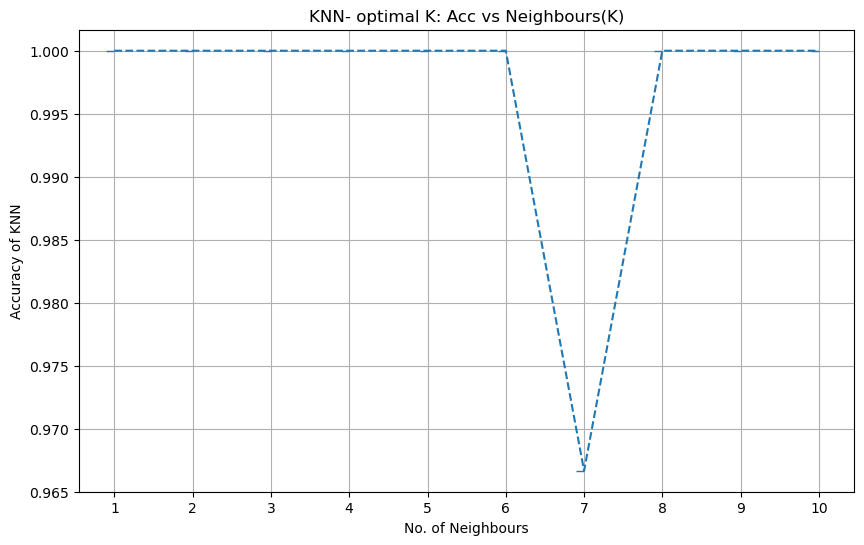

NameError: name 'accuarcy_values' is not defined

In [54]:
best_k= choose_k(X_train,X_test,y_train,y_test,10)
print("Optimal K is", best_k)

# Create KNN model

In [59]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

#Make Predictions

In [62]:
y_pred=knn.predict(X_test)

# Evaluate Model

In [65]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

